In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\AgriWages_DS_Project\\cleaned_agri_wages.csv")

In [4]:
# Step 2: Aggregate data at district level
# Calculate average wages & gender ratio per district
district_data = df.groupby("district_name").agg({
    "monthly_average_wage": "mean",
    "annual_average_wage": "mean",
    "gender": lambda x: (x == "Female").mean()  # % of females in workforce
}).reset_index()

In [5]:
district_data.rename(columns={"gender": "female_ratio"}, inplace=True)

print(district_data.head())

        district_name  monthly_average_wage  annual_average_wage  female_ratio
0  24 Paraganas North            241.771462           241.771624           0.0
1  24 Paraganas South            245.886598           245.887068           0.0
2            Adilabad            216.561123           216.561145           0.0
3          Agar Malwa            226.326194           226.326392           0.0
4                Agra            233.867292           233.867105           0.0


In [6]:
# Step 3: Select features for clustering
features = district_data[["monthly_average_wage", "annual_average_wage", "female_ratio"]]

In [7]:
# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [8]:
inertia = []
K = range(2, 11)  # trying k = 2 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

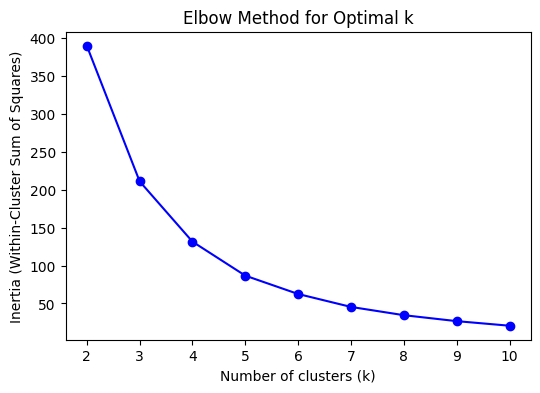

In [9]:
# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [11]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
district_data["Cluster"] = kmeans.fit_predict(X_scaled)

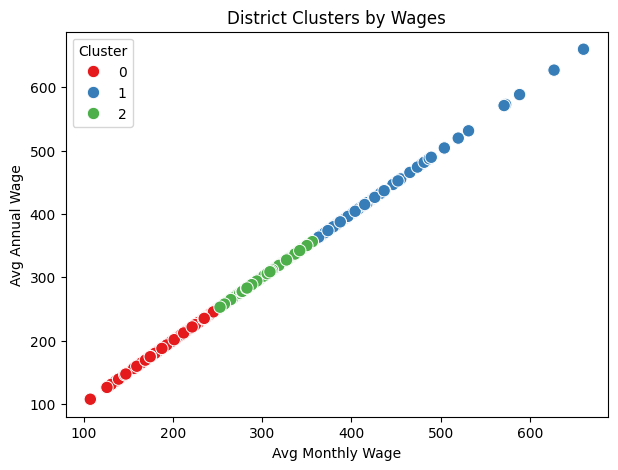

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=district_data["monthly_average_wage"],
    y=district_data["annual_average_wage"],
    hue=district_data["Cluster"],
    palette="Set1",
    s=80
)
plt.title("District Clusters by Wages")
plt.xlabel("Avg Monthly Wage")
plt.ylabel("Avg Annual Wage")
plt.legend(title="Cluster")
plt.show()


              precision    recall  f1-score   support

        High       0.60      0.71      0.65     28433
         Low       0.34      0.26      0.29     10961
      Medium       0.59      0.55      0.57     35789

    accuracy                           0.57     75183
   macro avg       0.51      0.51      0.51     75183
weighted avg       0.56      0.57      0.56     75183



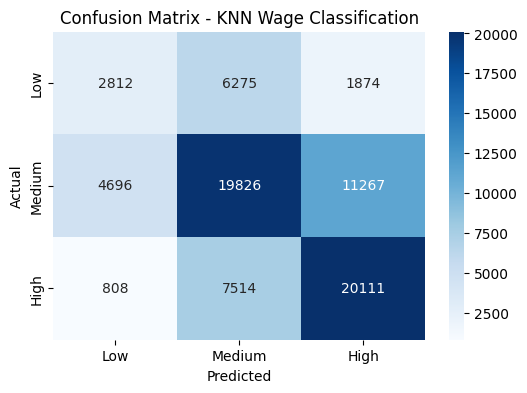

In [17]:
# KNN Classification Example (Wage Category with Visualization)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\AgriWages_DS_Project\\cleaned_agri_wages.csv")

# Step 1: Create wage categories
def wage_category(x):
    if x < 150:
        return "Low"
    elif x < 300:
        return "Medium"
    else:
        return "High"

df["wage_category"] = df["monthly_average_wage"].apply(wage_category)

# Step 2: Select features
X = df[["gender", "labour_type", "state_name"]]
y = df["wage_category"]

# Step 3: Encode categorical features
X = X.apply(LabelEncoder().fit_transform)

# Step 4: Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Predictions
y_pred = knn.predict(X_test)

# Step 8: Evaluation
print(classification_report(y_test, y_pred))

# Step 9: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Wage Classification")
plt.show()


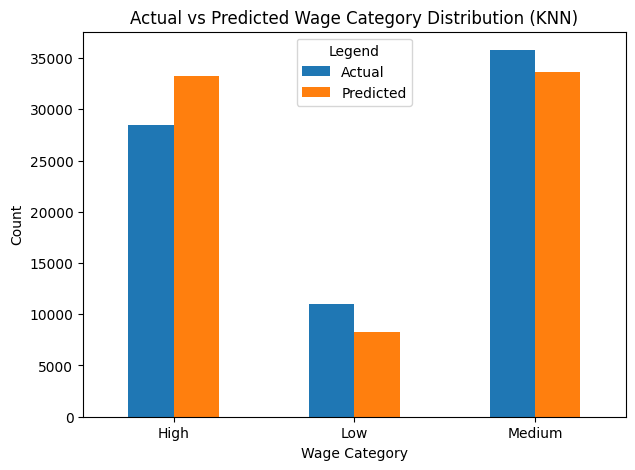

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count actual vs predicted values
actual_counts = y_test.value_counts().sort_index()
pred_counts = pd.Series(y_pred).value_counts().sort_index()

# Combine into a DataFrame for plotting
comparison_df = pd.DataFrame({
    "Actual": actual_counts,
    "Predicted": pred_counts
})

# Plot grouped bar chart
comparison_df.plot(kind="bar", figsize=(7,5))
plt.title("Actual vs Predicted Wage Category Distribution (KNN)")
plt.xlabel("Wage Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Legend")
plt.show()


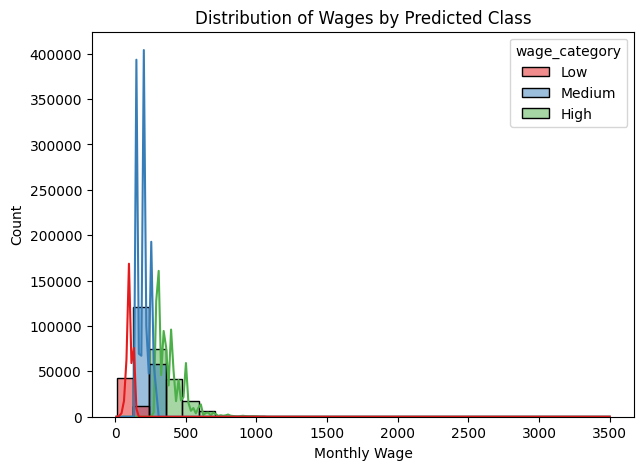

In [19]:
plt.figure(figsize=(7,5))
sns.histplot(x=df["monthly_average_wage"], hue=df["wage_category"], bins=30, kde=True, palette="Set1")
plt.title("Distribution of Wages by Predicted Class")
plt.xlabel("Monthly Wage")
plt.ylabel("Count")
plt.show()
